In [2]:
from sklearn.ensemble import RandomForestRegressor

In [3]:
%run Reddit_GME.ipynb

In [4]:
# define training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

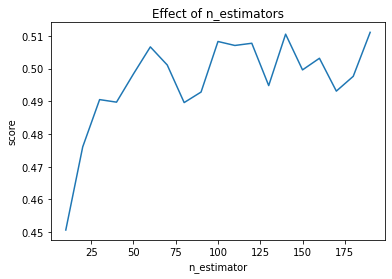

In [5]:
model = RandomForestRegressor()

# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [6]:
final_model = RandomForestRegressor(n_estimators=100, max_depth=9)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

In [7]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12111504094032231
Mean Squared Error: 0.030698185477094183
Root Mean Squared Error: 0.17520897658822787


In [8]:
R_square = r2_score(y_test, y_pred)
R_square

0.5212053110409527

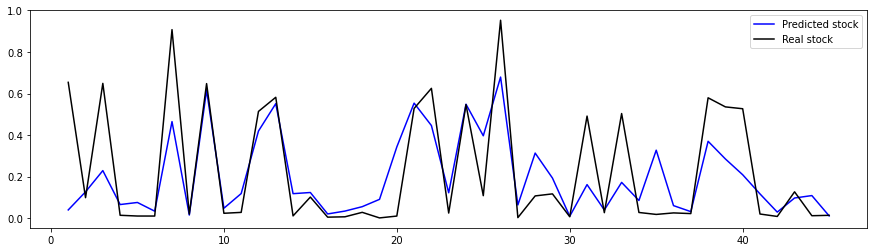

In [10]:
x = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]

fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(x, y_pred[0:45], color='blue', label='Predicted stock')
ax.plot(x, y_test[0:45], color='k', label='Real stock')
plt.legend()

In [9]:
import pickle 
pickle_out = open("predictor.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()